In [17]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv("/home/vikrant/5th SEm/EDA/Project/DEV/HAM10000_metadata.csv")

In [3]:
df.shape

(10015, 7)

In [4]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [35]:
df.describe()

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


In [8]:
# Path to the metadata
metadata_path = r'./HAM10000_metadata.csv'

# Load metadata from the specified path
metadata = pd.read_csv(metadata_path)

for i in metadata:
    print("{}: {}".format(i,metadata[i].unique()))

lesion_id: ['HAM_0000118' 'HAM_0002730' 'HAM_0001466' ... 'HAM_0005579' 'HAM_0001576'
 'HAM_0002867']
image_id: ['ISIC_0027419' 'ISIC_0025030' 'ISIC_0026769' ... 'ISIC_0033536'
 'ISIC_0032854' 'ISIC_0032258']
dx: ['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']
dx_type: ['histo' 'consensus' 'confocal' 'follow_up']
age: [80. 75. 60. 70. 55. 85. 65. 40. 50. 45. 35.  0. 30. nan  5. 25. 20. 10.
 15.]
sex: ['male' 'female' 'unknown']
localization: ['scalp' 'ear' 'face' 'back' 'trunk' 'chest' 'upper extremity' 'abdomen'
 'unknown' 'lower extremity' 'genital' 'neck' 'hand' 'foot' 'acral']


In [16]:
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(),4), "% missing values")

age 0.0057 % missing values


In [33]:
print('sex',np.round(df[df['sex']=='unknown'].shape[0]/df.shape[0],4))

sex 0.0057


In [32]:
print('localization',np.round(df[df['localization']=='unknown'].shape[0]/df.shape[0],4))

localization 0.0234


Number of categories: 7
Category counts:
dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


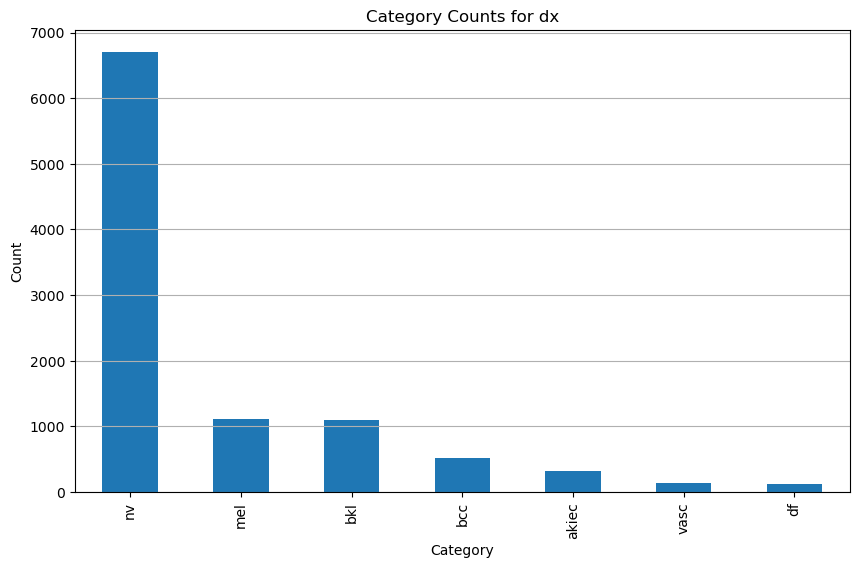

In [24]:
category_counts = df['dx'].value_counts()

# Print the number of categories and their counts
print("Number of categories:", len(category_counts))
print("Category counts:")
print(category_counts)

# Visualize the category counts
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Category Counts for ' + 'dx')
plt.xlabel('Category')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [28]:
print("Number of duplicate entries before removal:", df.duplicated().sum())

# Remove duplicate entries
df.drop_duplicates(inplace=True)

# Check for duplicate entries again (should be 0 after removal)
print("Number of duplicate entries after removal:", df.duplicated().sum())


Number of duplicate entries before removal: 0
Number of duplicate entries after removal: 0


In [36]:
# Step 1: Load and preprocess the dataset
def preprocess_data(df):
    # Drop rows with missing values or 'unknown' values
    df = df.dropna()
    df = df[df != 'unknown'].dropna()
    
    # Convert categorical columns into numerical labels
    cat_cols = ['dx', 'dx_type', 'sex', 'localization']
    for col in cat_cols:
        df[col] = pd.Categorical(df[col]).codes
    
    print(df.head())
    return df

In [40]:
df = preprocess_data(df)

     lesion_id      image_id  dx  dx_type   age  sex  localization
0  HAM_0000118  ISIC_0027419   2        3  80.0    1            11
1  HAM_0000118  ISIC_0025030   2        3  80.0    1            11
2  HAM_0002730  ISIC_0026769   2        3  80.0    1            11
3  HAM_0002730  ISIC_0025661   2        3  80.0    1            11
4  HAM_0001466  ISIC_0031633   2        3  75.0    1             4


In [45]:
print(df['age'].mean())
print(df['age'].median())
print(df['age'].std())
print(df['age'].max())
print(df['age'].min())

51.863828077927295
50.0
16.968613692495364
85.0
0.0


In [50]:
def cat_stats(column):
    frequency_counts = df[column].value_counts()

    # Proportions of each category
    proportions = df[column].value_counts(normalize=True)

    print("Frequency counts:")
    print(frequency_counts)
    print("\nProportions:")
    print(proportions)

In [54]:
cols = ['dx','dx_type','localization','sex']
cat_stats(cols[3])

Frequency counts:
sex
male       5406
female     4552
unknown      57
Name: count, dtype: int64

Proportions:
sex
male       0.539790
female     0.454518
unknown    0.005691
Name: proportion, dtype: float64
